In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
df = pd.read_csv("insurance_data.csv")

In [4]:
print(df.head())

   Age        BMI  Children  Smoker         Income  Exercise_Level  \
0   56  19.128513         4       0  575896.702256               1   
1   46  21.996988         1       0  645859.385259               0   
2   32  26.091815         1       0  514214.161379               0   
3   60  29.891511         4       1  558970.457528               1   
4   25  22.679650         2       0  513255.062316               1   

   Region_Risk  PreExistingConditions       Premium  
0     1.208612                      1  45009.067901  
1     0.970074                      1  25986.984881  
2     0.945865                      0  29401.575452  
3     1.259498                      1  83629.528955  
4     0.948615                      2  27588.575081  


In [5]:
print(df.tail())

      Age        BMI  Children  Smoker         Income  Exercise_Level  \
9995   33  33.725265         3       0  504124.454989               1   
9996   29  31.210769         4       0  545981.941478               2   
9997   18  27.619135         0       0  459884.567632               2   
9998   25  20.038704         2       0  456002.169769               2   
9999   30  28.661902         2       0  162785.721084               2   

      Region_Risk  PreExistingConditions       Premium  
9995     1.126368                      1  34488.451588  
9996     0.906266                      0  28667.783154  
9997     0.810917                      2  20029.698216  
9998     1.207302                      1  33900.284379  
9999     1.228081                      2  36750.519146  


In [6]:
df.shape

(10000, 9)

In [7]:
df.columns

Index(['Age', 'BMI', 'Children', 'Smoker', 'Income', 'Exercise_Level',
       'Region_Risk', 'PreExistingConditions', 'Premium'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   BMI                    10000 non-null  float64
 2   Children               10000 non-null  int64  
 3   Smoker                 10000 non-null  int64  
 4   Income                 10000 non-null  float64
 5   Exercise_Level         10000 non-null  int64  
 6   Region_Risk            10000 non-null  float64
 7   PreExistingConditions  10000 non-null  int64  
 8   Premium                10000 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 703.3 KB


In [9]:
df.describe()

,Age,BMI,Children,Smoker,Income,Exercise_Level,Region_Risk,PreExistingConditions,Premium
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.054000,27.001457,2.049000,0.196000,4.979099e+05,0.988800,1.049840,0.997300,37753.389911
std,13.484104,4.980192,1.420423,0.396988,1.507992e+05,0.814703,0.143781,0.819732,13150.924333
min,18.000000,6.729750,0.000000,0.000000,-1.698406e+05,0.000000,0.800023,0.000000,2029.052012
25%,30.000000,23.580464,1.000000,0.000000,3.952116e+05,0.000000,0.926841,0.000000,28331.175193
50%,41.000000,26.987926,2.000000,0.000000,4.976038e+05,1.000000,1.049307,1.000000,36830.843841
75%,53.000000,30.353262,3.000000,0.000000,6.008860e+05,2.000000,1.175318,2.000000,46116.373226
max,64.000000,44.997334,4.000000,1.000000,1.059175e+06,2.000000,1.299970,2.000000,97451.445289


In [10]:
print(df.isnull().sum().sum())

0


In [11]:
df.duplicated().sum()

0

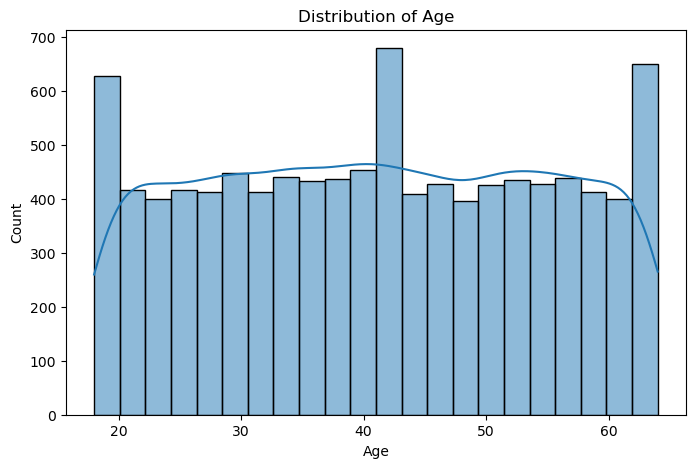

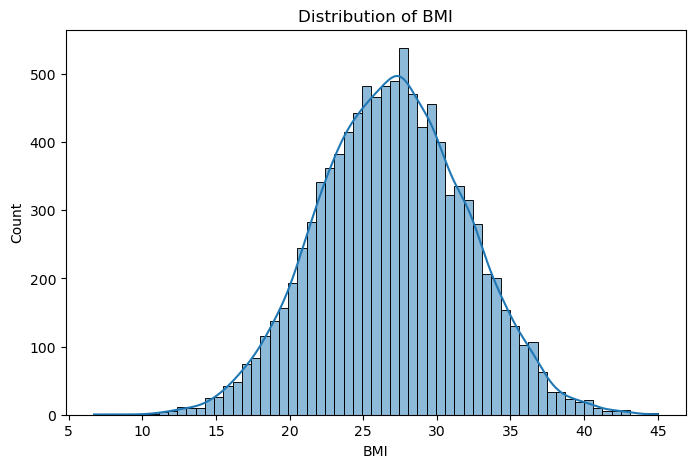

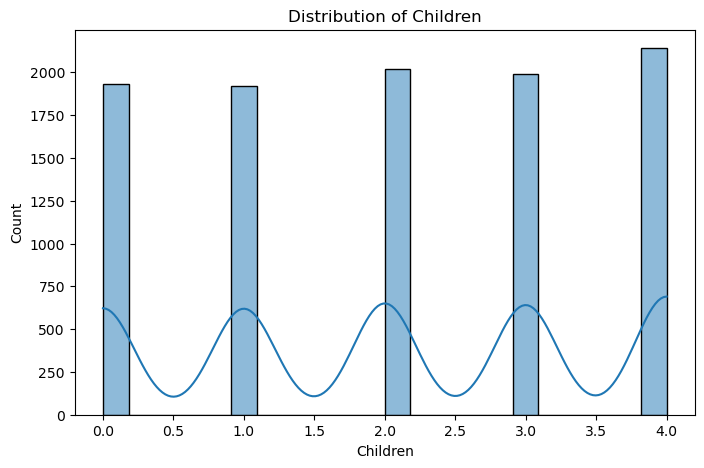

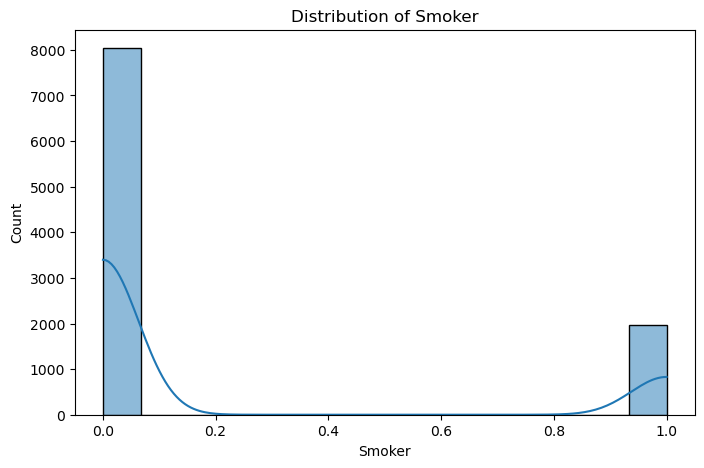

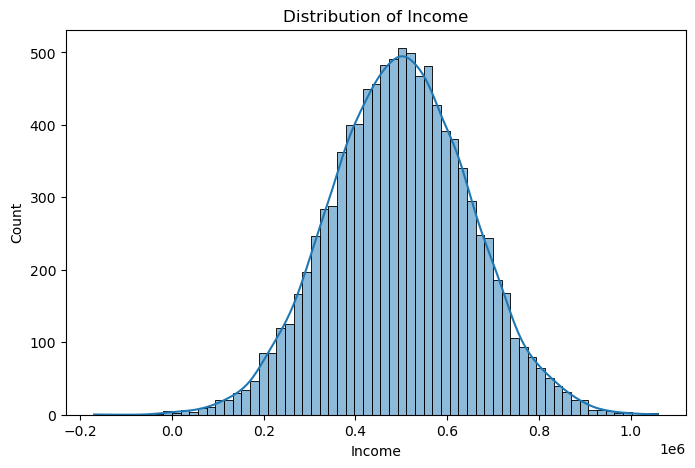

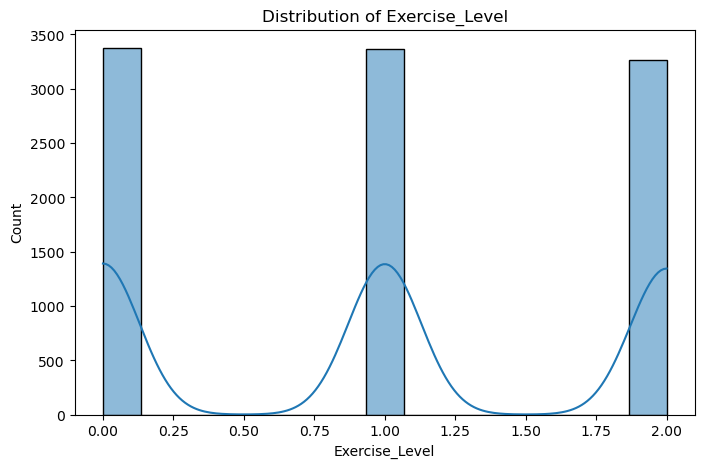

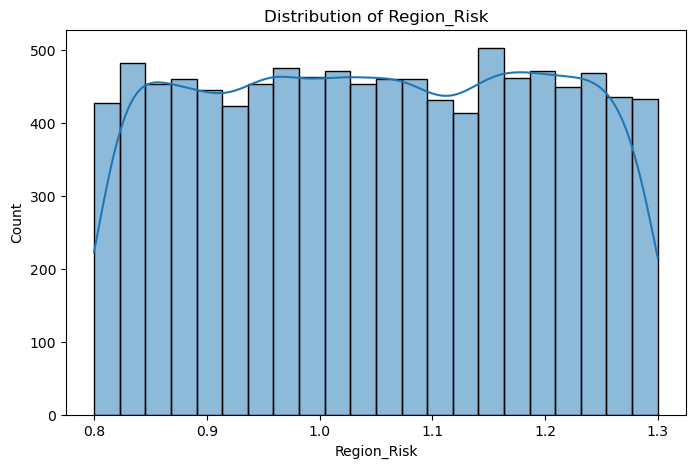

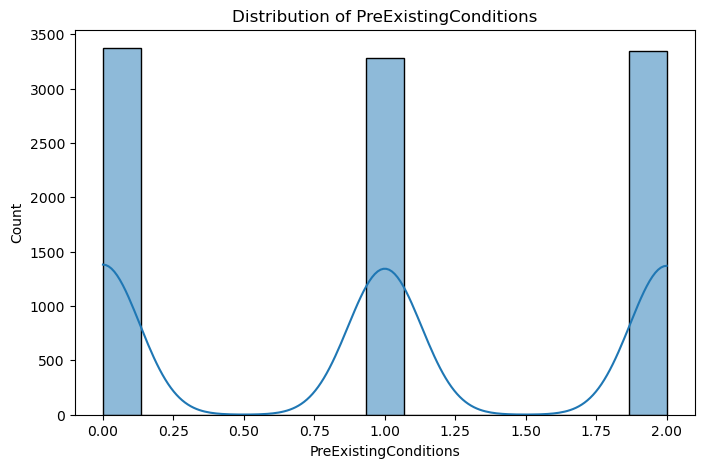

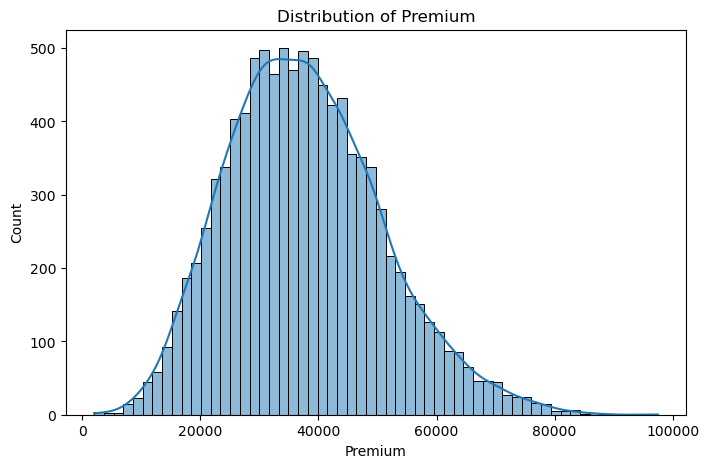

In [12]:
for col in df.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

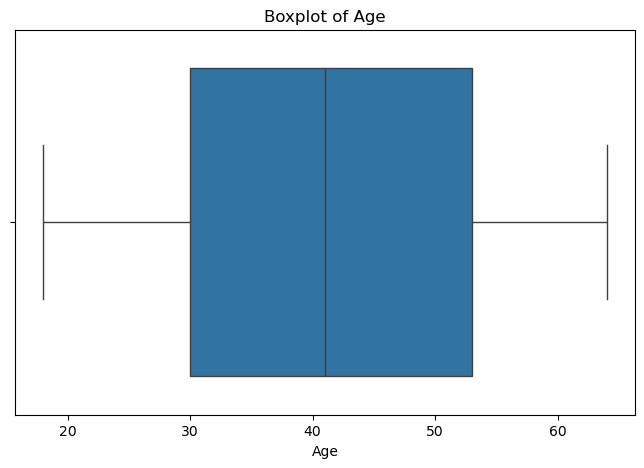

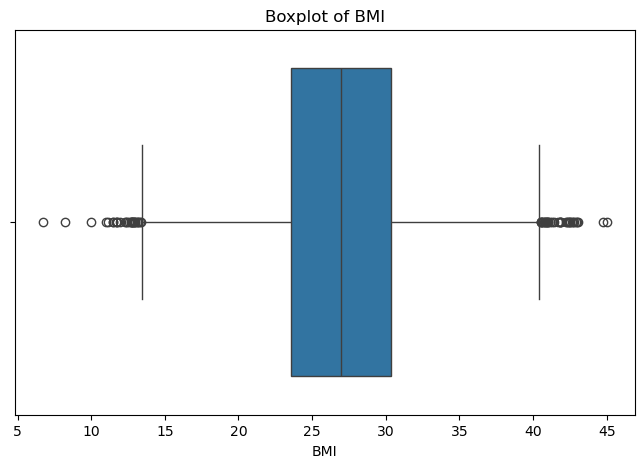

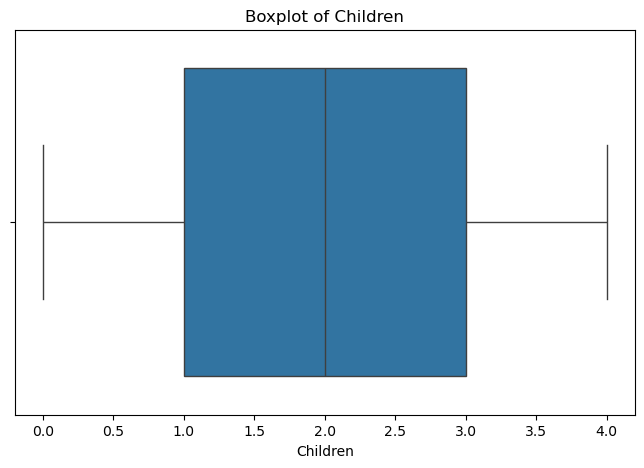

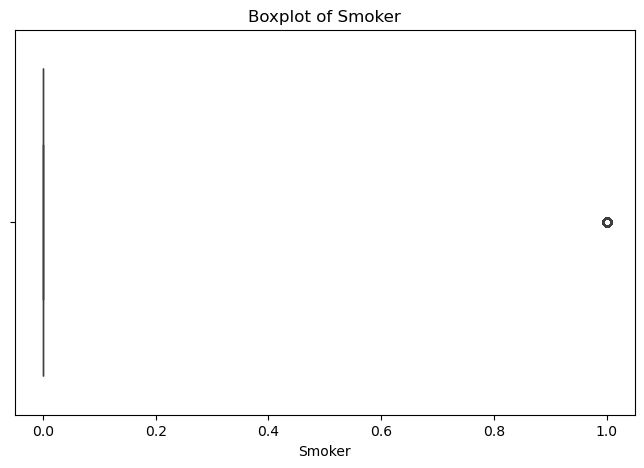

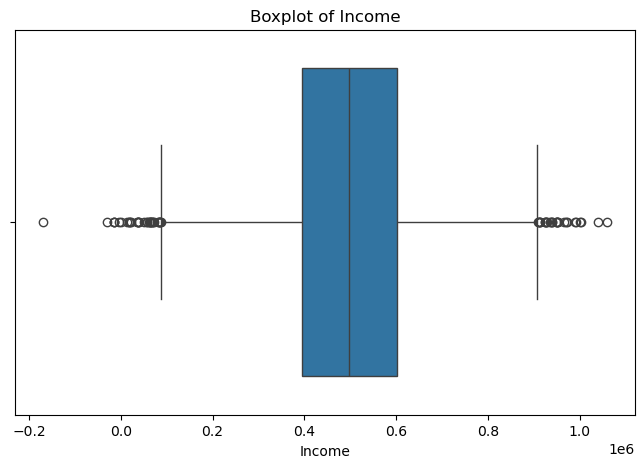

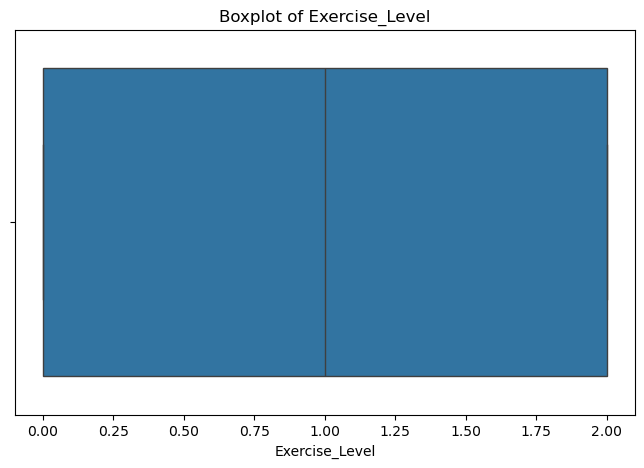

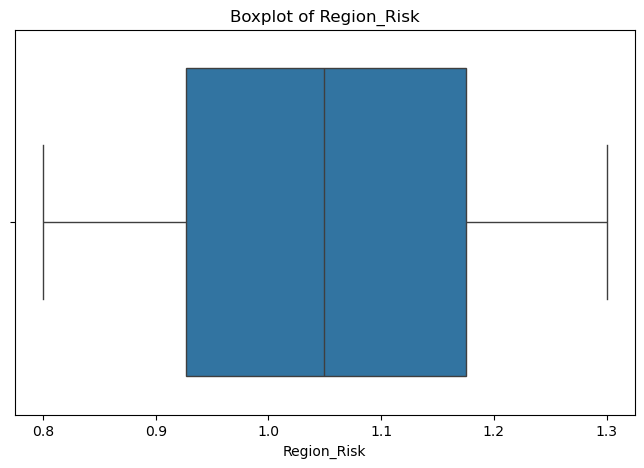

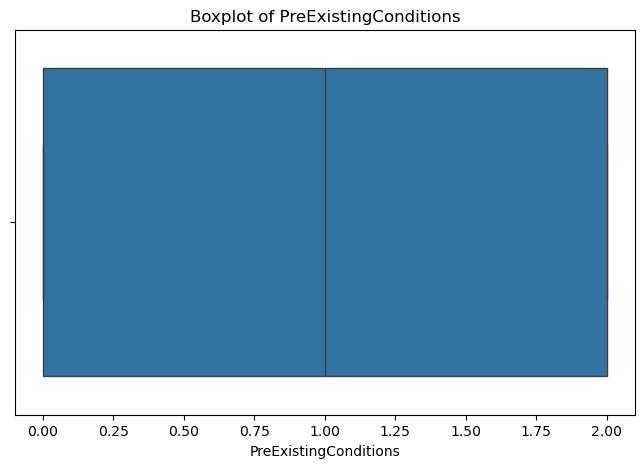

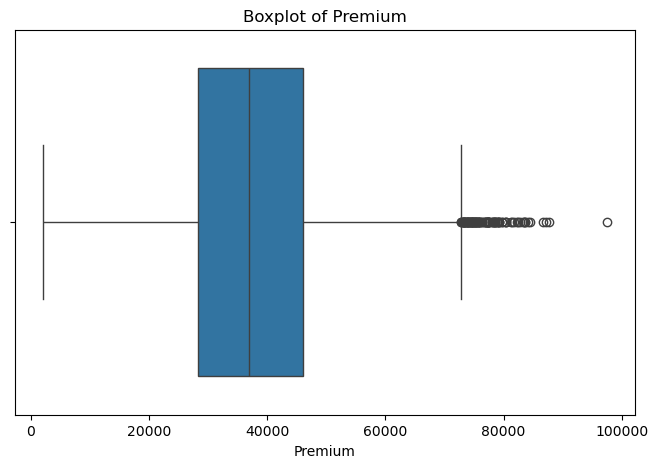

In [13]:
for i in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns

In [15]:
import numpy as np

def iqr_capping(df, columns):
    df_copy = df.copy()
    
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_copy[col] = np.where(df_copy[col] < lower, lower,
                         np.where(df_copy[col] > upper, upper,
                                  df_copy[col]))
    
    return df_copy

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("Premium")

df = iqr_capping(df, numeric_cols)

print("Capping completed")

Capping completed


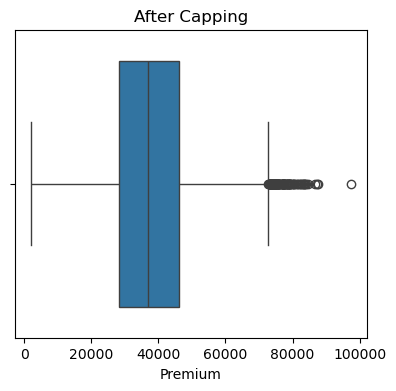

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df["Premium"])
plt.title("After Capping")
plt.show()

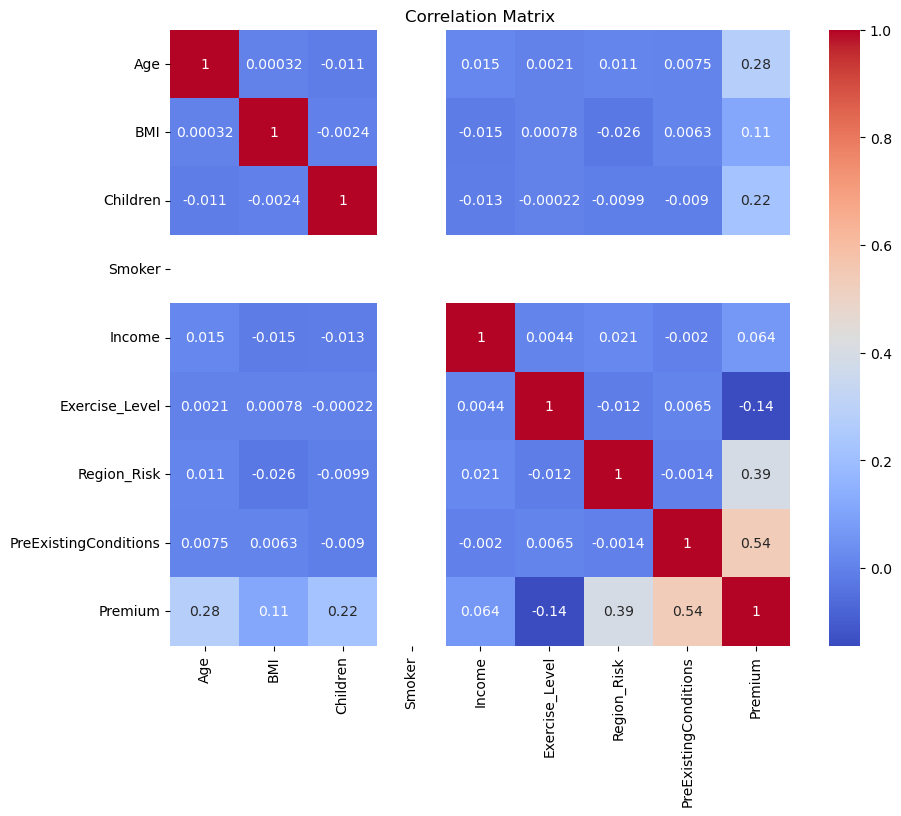

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [19]:
X = df.drop("Premium", axis=1)
y = df["Premium"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
degree = 2

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=degree)),
    ("model", LinearRegression())
])

In [22]:
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('poly', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring="r2")
rmse_scores = np.sqrt(
    -cross_val_score(pipeline, X, y, cv=kfold, scoring="neg_mean_squared_error")
)


In [24]:
print("\n===== Cross Validation =====")
print("CV R2 Mean:", r2_scores.mean())
print("CV RMSE Mean:", rmse_scores.mean())



===== Cross Validation =====
CV R2 Mean: 0.6204802887171292
CV RMSE Mean: 8098.174679646678


In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [27]:
print("\n===== Test Metrics =====")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)



===== Test Metrics =====
MAE: 6271.534873524574
MSE: 66184892.9759982
RMSE: 8135.409822252239
R2 Score: 0.6304670169720786


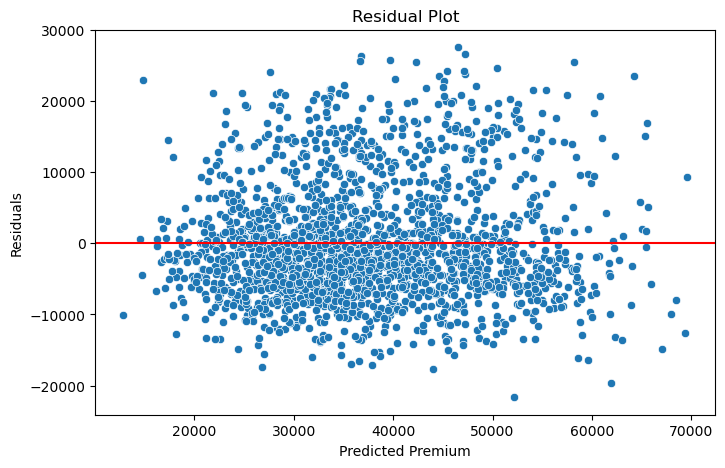

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red")
plt.title("Residual Plot")
plt.xlabel("Predicted Premium")
plt.ylabel("Residuals")
plt.show()

In [29]:
print("\n===== Degree Comparison =====")

for d in [1, 2, 3]:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=d)),
        ("model", LinearRegression())
    ])

    scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    print(f"Degree {d} R2 Mean:", scores.mean())



===== Degree Comparison =====
Degree 1 R2 Mean: 0.6116626773704897
Degree 2 R2 Mean: 0.6198032141496774
Degree 3 R2 Mean: 0.6162558331978737


In [30]:
joblib.dump(pipeline, "insurance_polynomial_model.pkl")

print("\nModel Saved Successfully ")


Model Saved Successfully 
